# Meissner effect in one dimension

Programs to solve the GL BVP with an applied field H at x=0 of half infinite superconductor in region x&gt;0.

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from html.entities import html5
import ipywidgets as widgets
from matplotlib.widgets import TextBox
kappa = widgets.FloatSlider(description="kappa",value=1)
L=widgets.FloatSlider(description="length",value=10)
b0=widgets.FloatSlider(description="applied b",value=.5)

FloatSlider(value=1.0, description='kappa')

FloatSlider(value=10.0, description='length')

FloatSlider(value=0.5, description='applied b')

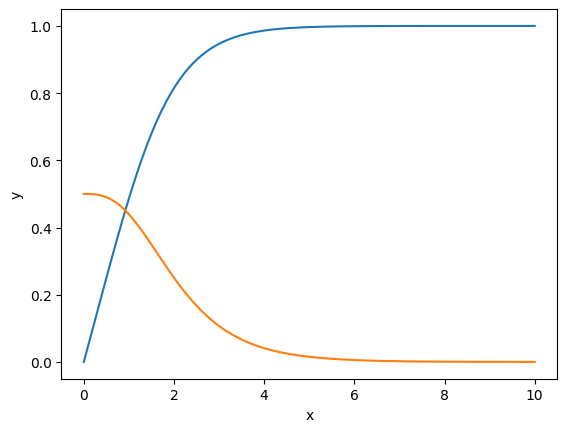

In [2]:
# London boundary conditions: b=da=b0,f=0 at x=0; b=da=0,f=1  at x=L, 
def gl(kappa,L,b0):
  def fun(x,y):
    f = y[0]
    df = y[1]
    a=y[2]
    da=y[3]
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),da,a*f**2))
  def bc(ya, yb):
    return np.array([ya[0], yb[0]-1, ya[3]-b0,yb[3]+yb[2]])
  rng=[0, L]
  x = np.linspace(*rng, 20)
  y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    y[0,k]=1
  sol = solve_bvp(fun, bc, x, y)
  x_plot = np.linspace(*rng, 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot)
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot)
  return 0

display(kappa)
display(L)
display(b0)

gl(kappa.value,L.value,b0.value)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


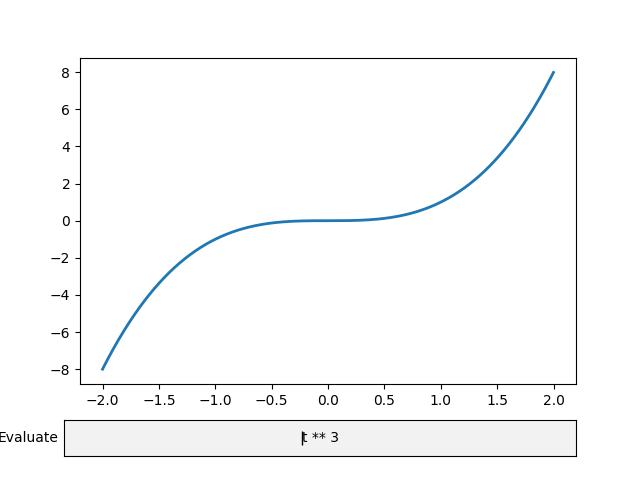

In [3]:
%pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import TextBox

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

t = np.arange(-2.0, 2.0, 0.001)
l, = ax.plot(t, np.zeros_like(t), lw=2)


def submit(expression):
    """
    Update the plotted function to the new math *expression*.

    *expression* is a string using "t" as its independent variable, e.g.
    "t ** 3".
    """
    ydata = eval(expression, {'np': np}, {'t': t})
    l.set_ydata(ydata)
    ax.relim()
    ax.autoscale_view()
    plt.draw()


axbox = fig.add_axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, "Evaluate", textalignment="center")
text_box.on_submit(submit)
text_box.set_val("t ** 3")  # Trigger `submit` with the initial string.

plt.show()


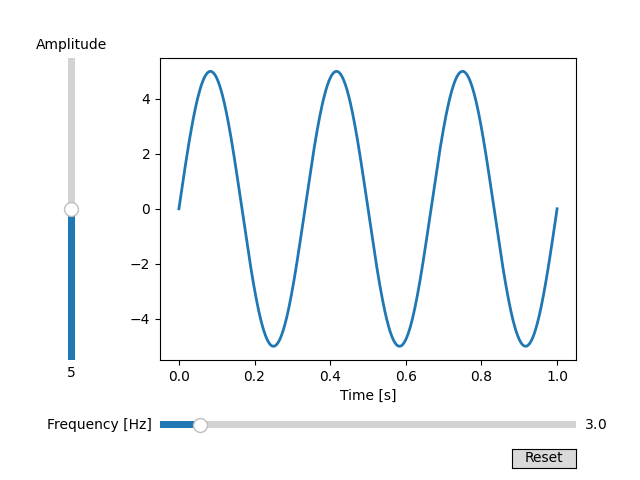

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()